In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/rainfall_in_india_1901-2015[1].csv")

In [ ]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
data.shape

(4116, 19)

In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


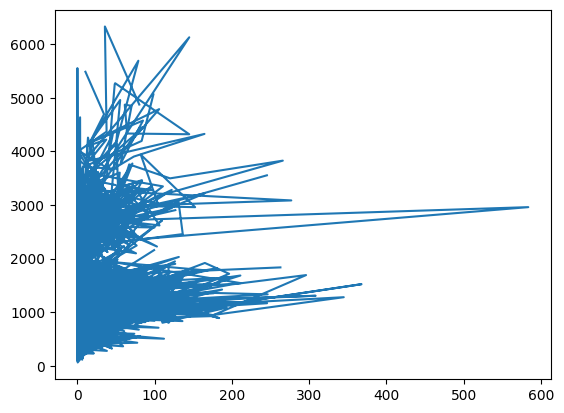

In [ ]:
x1=data['JAN']
y=data['ANNUAL']
plt.plot(x1,y)

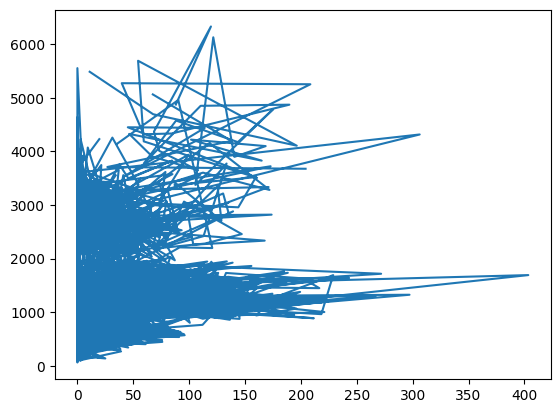

In [ ]:
x2=data['FEB']
y=data['ANNUAL']
plt.plot(x2,y)

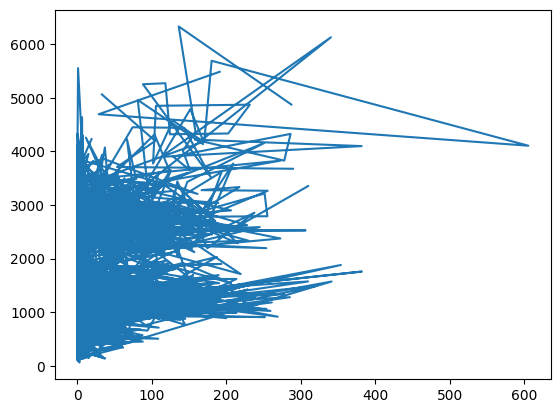

In [ ]:
x3=data['MAR']
y=data['ANNUAL']
plt.plot(x3,y)

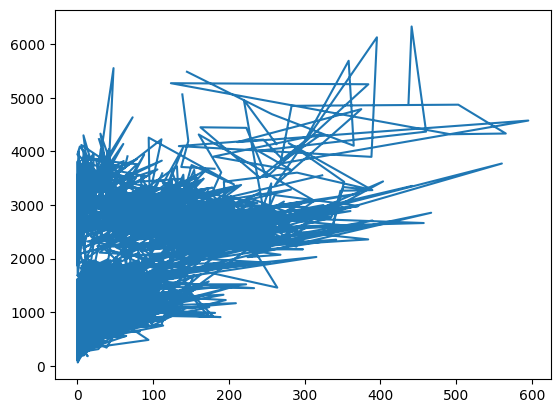

In [ ]:
x4=data['APR']
y=data['ANNUAL']
plt.plot(x4,y)

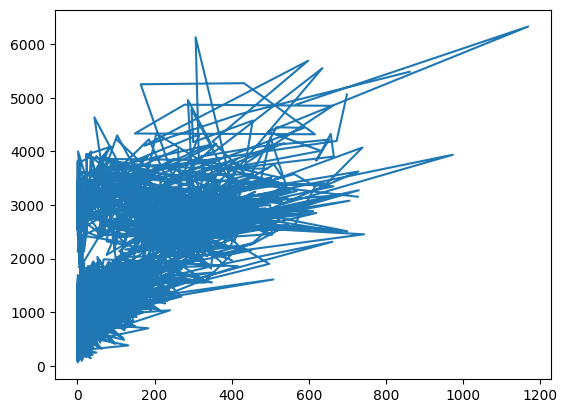

In [ ]:
x5=data['MAY']
y=data['ANNUAL']
plt.plot(x5,y)

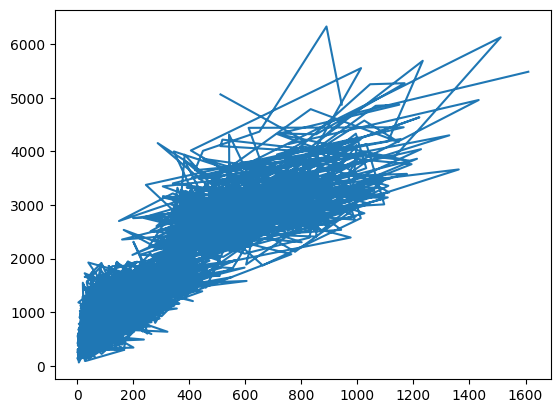

In [ ]:
x6=data['JUN']
y=data['ANNUAL']
plt.plot(x6,y)

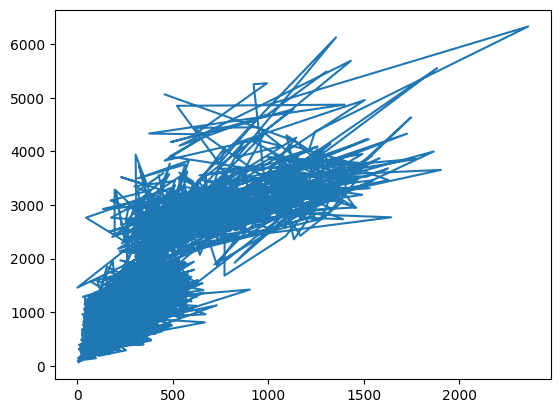

In [ ]:
x7=data['JUL']
y=data['ANNUAL']
plt.plot(x7,y)

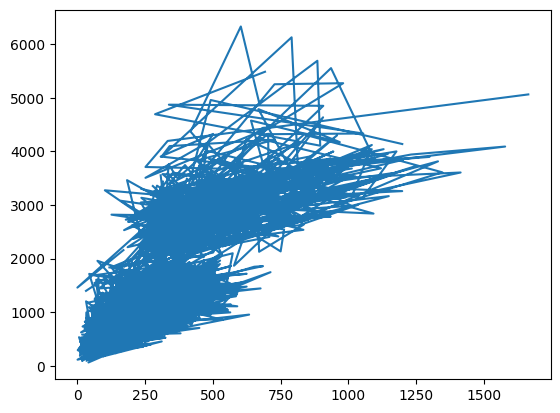

In [ ]:
x8=data['AUG']
y=data['ANNUAL']
plt.plot(x8,y)

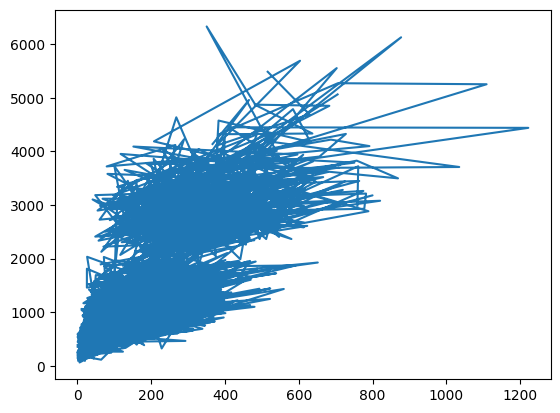

In [ ]:
x9=data['SEP']
y=data['ANNUAL']
plt.plot(x9,y)

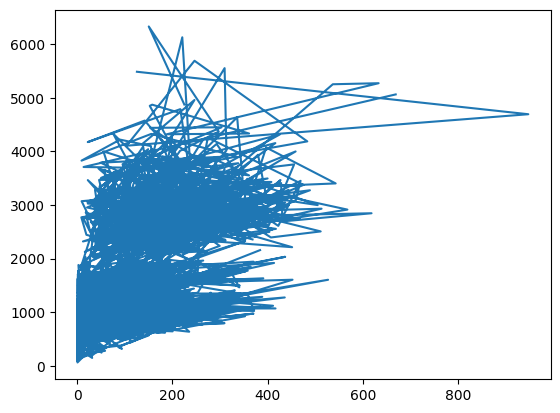

In [ ]:
x10=data['OCT']
y=data['ANNUAL']
plt.plot(x10,y)

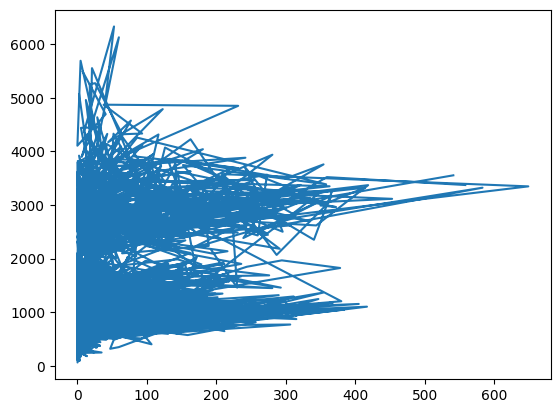

In [ ]:
x11=data['NOV']
y=data['ANNUAL']
plt.plot(x11,y)

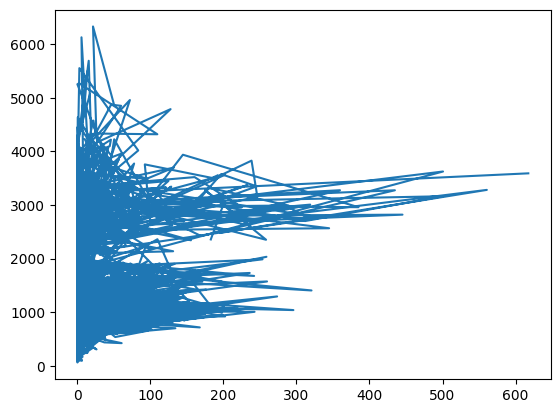

In [ ]:
x12=data['DEC']
y=data['ANNUAL']
plt.plot(x12,y)

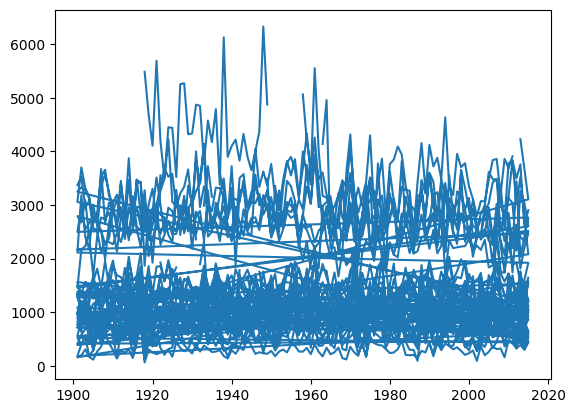

In [ ]:
x13=data['YEAR']
y=data['ANNUAL']
plt.plot(x13,y)

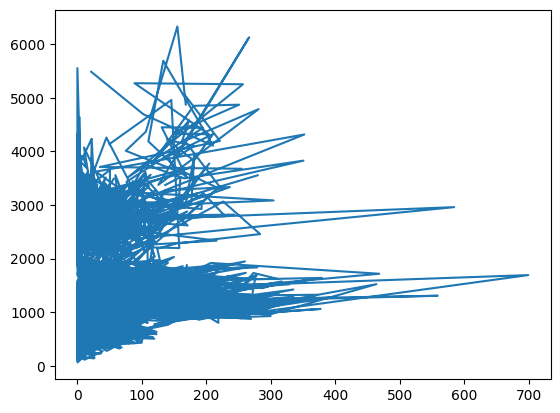

In [ ]:
x14=data['Jan-Feb']
y=data['ANNUAL']
plt.plot(x14,y)

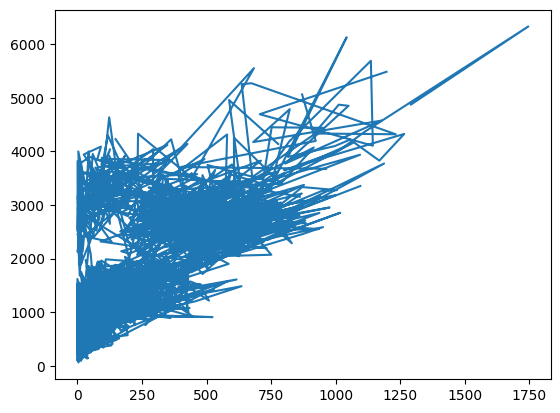

In [ ]:
x15=data['Mar-May']
y=data['ANNUAL']
plt.plot(x15,y)

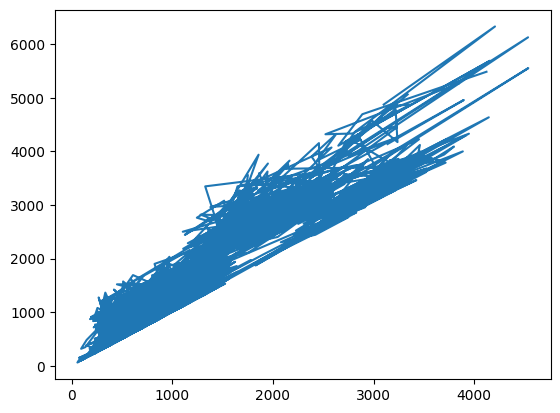

In [ ]:
x16=data['Jun-Sep']
y=data['ANNUAL']
plt.plot(x16,y)

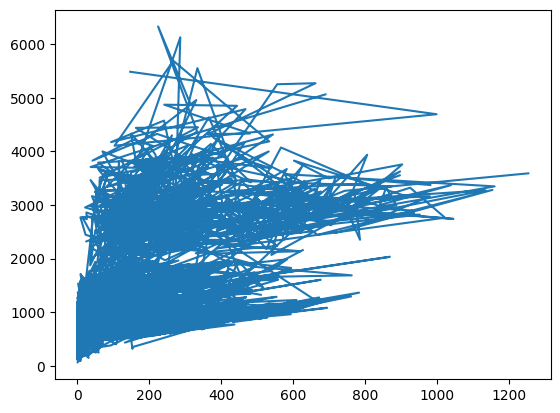

In [ ]:
x17=data['Oct-Dec']
y=data['ANNUAL']
plt.plot(x17,y)

In [ ]:
data=data.dropna()

In [ ]:
x=data.drop(['ANNUAL','SUBDIVISION','YEAR'] ,axis=1)
y=data['ANNUAL']
print(x)

       JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0     49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1  332.6  388.5   
1      0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7  666.2  197.2   
2     12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7  339.0  181.2   
3      9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1  820.4  222.2   
4      1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5  297.0  260.7   
...    ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
4111   5.1    2.8   3.1   85.9  107.2  153.6  350.2  254.0  255.2  117.4   
4112  19.2    0.1   1.6   76.8   21.2  327.0  231.5  381.2  179.8  145.9   
4113  26.2   34.4  37.5    5.3   88.3  426.2  296.4  154.4  180.0   72.8   
4114  53.2   16.1   4.4   14.9   57.4  244.1  116.1  466.1  132.2  169.2   
4115   2.2    0.5   3.7   87.1  133.1  296.6  257.5  146.4  160.4  165.4   

        NOV    DEC  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0     558.2   33.6    136.3   

In [ ]:
print(y)

0       3373.2
1       3520.7
2       2957.4
3       3079.6
4       2566.7
         ...  
4111    1533.7
4112    1405.5
4113    1426.3
4114    1395.0
4115    1642.9
Name: ANNUAL, Length: 4090, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=True)

lin_reg_model=LinearRegression()

reg=lin_reg_model.fit(x_train,y_train)

w=reg.score(x_test,y_test)

reg.score(x_train,y_train)

train_prediction=lin_reg_model.predict(x_train)

error_score=metrics.r2_score(y_train,train_prediction)
print(error_score)

0.9999999960226824


In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

j=lasso_reg.score(x_test,y_test)
trainl_prediction=lasso_reg.predict(x_train)
error2_score=metrics.r2_score(y_train,trainl_prediction)
print(error2_score)

jj=lasso_reg.score(x_train,y_train)

0.9971251938429514


In [ ]:
from sklearn.linear_model import Ridge
Ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
Ridge_reg.fit(x_train,y_train)
trainr_prediction=Ridge_reg.predict(x_train)
error_scorer=metrics.r2_score(y_train,trainr_prediction)
print(error_scorer)
ff=Ridge_reg.score(x_train,y_train)

ll=Ridge_reg.score(x_test,y_test)

0.9999999960181732
